#  K-Means Clustering Project: Customer Segmentation for a Retail Store

Problem Statement:
- Segment retail customers based on their purchasing behavior (e.g., frequency, amount spent, recency) so the store can target marketing campaigns to different customer groups.

K-Means is ideal here because:

- No labels (no y column)

- Natural clusters (high spender, frequent buyer, new customer, etc.)

| Feature            | Description                           |
| ------------------ | ------------------------------------- |
| `annual_spending`  | Total amount spent in a year (₹1000s) |
| `visits_per_month` | Average store visits per month        |
| `recency`          | Days since last purchase              |
| `loyalty_years`    | Years as a customer                   |




In [1]:
# Simulate Dataset

import pandas as pd
import numpy as np

np.random.seed(42)

data = pd.DataFrame({
    'annual_spending': np.random.randint(20, 250, 30),
    'visits_per_month': np.random.randint(1, 20, 30),
    'recency': np.random.randint(1, 100, 30),
    'loyalty_years': np.round(np.random.uniform(0.5, 10, 30), 1)
})

data.head()


,annual_spending,visits_per_month,recency,loyalty_years
0,122,1,36,3.9
1,199,12,50,3.2
2,112,12,4,5.7
3,34,17,2,1.8
4,126,10,6,8.1


In [2]:
# Preprocessing
# We need to scale the data before using K-Means.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


In [3]:
# Fit K-Means Model
# Let’s try 3 clusters first.
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(scaled_data)

data['cluster'] = kmeans.labels_


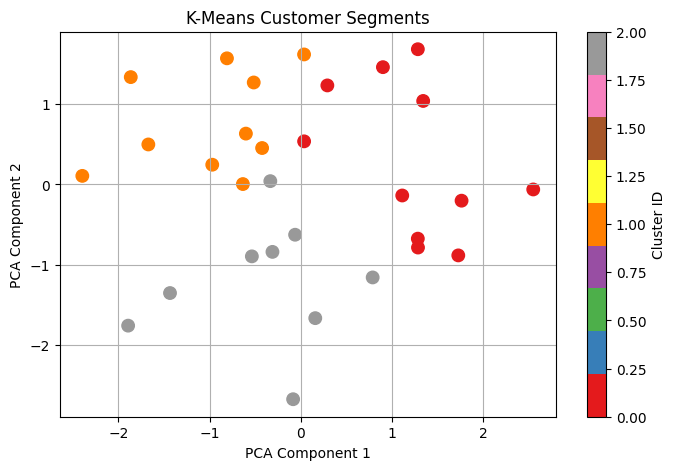

In [4]:
# Visualize Clusters (2D using PCA)
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 5))
plt.scatter(reduced[:, 0], reduced[:, 1], c=data['cluster'], cmap='Set1', s=80)
plt.title("K-Means Customer Segments")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid()
plt.colorbar(label='Cluster ID')
plt.show()


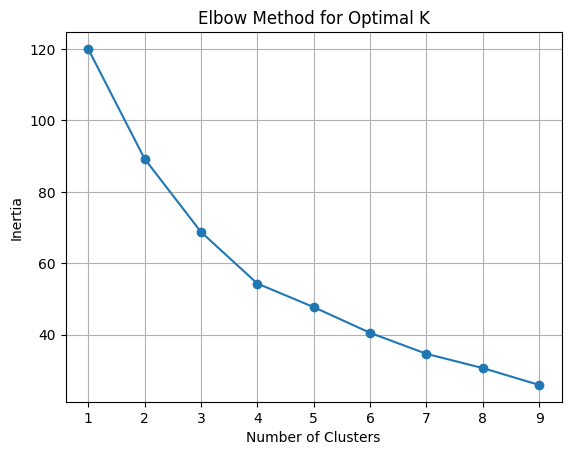

In [6]:
# Find Optimal Number of Clusters (Elbow Method)

inertias = []
for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(scaler.transform(data.drop('cluster', axis=1)))
    inertias.append(km.inertia_)

plt.plot(range(1, 10), inertias, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid()
plt.show()

# Look for the "elbow" point — that’s the ideal number of clusters.


In [7]:
# Interpret the Cluster

# View mean of each cluster
cluster_summary = data.groupby('cluster').mean()
print(cluster_summary)


         annual_spending  visits_per_month    recency  loyalty_years
cluster                                                             
0              91.000000         16.454545  48.181818       3.881818
1             133.800000          5.500000  73.600000       4.740000
2             183.555556         11.000000  28.555556       7.022222


Example Interpretation:

| Cluster | Description                    |
| ------- | ------------------------------ |
| 0       | Newer customers, low spenders  |
| 1       | Loyal, high-frequency shoppers |
| 2       | Infrequent, high-value buyers  |

| Strength                                  | Why It Helps                 |
| ----------------------------------------- | ---------------------------- |
| 💡 Easy to implement                      | Only need number of clusters |
| ⚡ Fast & efficient                        | Even on large datasets       |
| 📊 Works well when clusters are spherical | Easy to visualize using PCA  |


| Limitation                   | Why It Matters                       |
| ---------------------------- | ------------------------------------ |
| ❌ Must specify `k`           | May not know how many clusters exist |
| 🧠 Sensitive to scaling      | Needs normalization                  |
| ⚠️ Sensitive to outliers     | Can shift centroids wrongly          |
| ⭕ Assumes spherical clusters | Poor for irregular shapes            |


Real-World Use Cases
📦 E-commerce: Customer segmentation

💳 Banking: Transaction pattern clustering

🛒 Retail: Personalized promotions

🎮 Gaming: Player behavior clustering


In [9]:
# Optional: Save Clustered Data
# data.to_csv("segmented_customers.csv", index=False)

Project Summary
Goal: Group retail customers by purchasing behavior using K-Means

Method: PCA + clustering + elbow method

Outcome: Found 3 natural customer segments for personalized marketing

Tools: KMeans, PCA, StandardScaler